<a href="https://colab.research.google.com/github/nikhil-xyz/Machine-Learning-Practice/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data = load_iris()

In [ ]:
X = data.data
y = data.target

In [ ]:
X.shape

(150, 4)

In [ ]:
param_grid = {'max_depth' : [2, 3, 4],
              'criterion' : ['gini', 'entropy']
              }

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
best_model = grid.best_estimator_

In [ ]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9666666666666667


In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

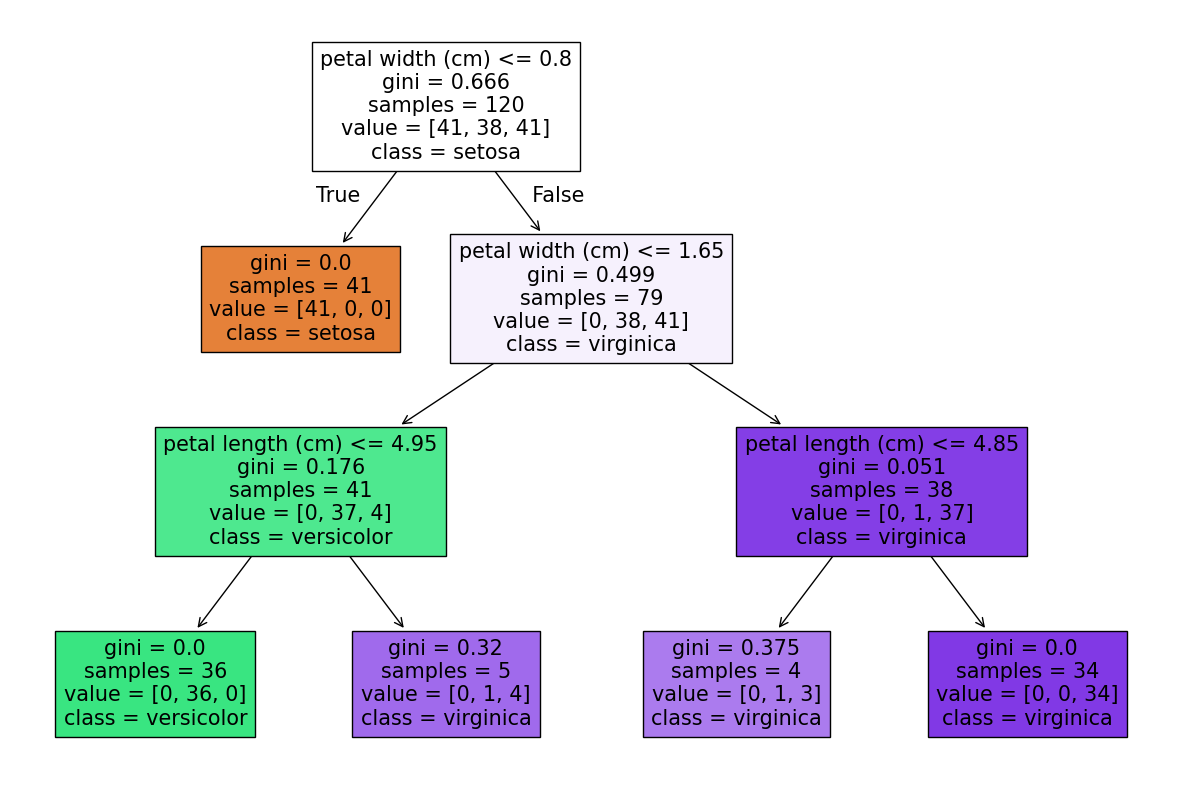

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(best_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [ ]:
import graphviz

In [ ]:
# Export decision tree as a .dot file
dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True, special_characters=True)

# Convert to a Graphviz object and display
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as 'decision_tree.pdf' or 'decision_tree.png'
graph.view()  # Opens the tree visualization

'decision_tree.pdf'

Best ccp_alpha: 0.0
Pruned Model Accuracy on Test Data: 0.9666666666666667


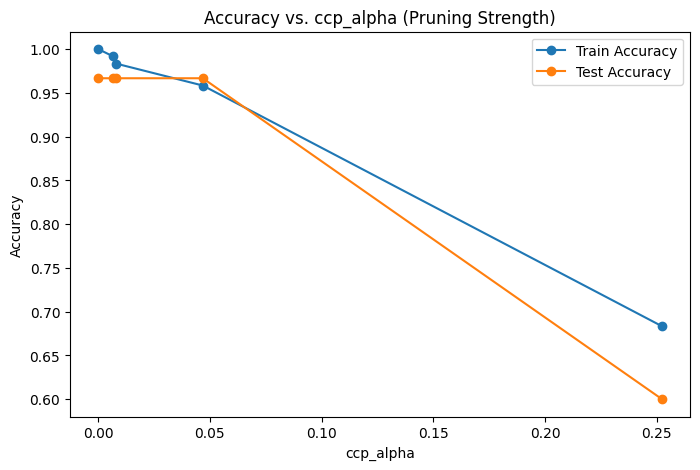

In [ ]:
# Train an initial decision tree to find ccp_alpha values
clf = DecisionTreeClassifier(random_state=30)
clf.fit(X_train, y_train)

# Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the last alpha as it's the trivial tree

# Train and evaluate models with different ccp_alpha values
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    pruned_clf = DecisionTreeClassifier(random_state=30, ccp_alpha=alpha)
    pruned_clf.fit(X_train, y_train)

    train_pred = pruned_clf.predict(X_train)
    test_pred = pruned_clf.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

# Find the best alpha that maximizes test accuracy
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]

# Train the final pruned model
pruned_tree = DecisionTreeClassifier(random_state=30, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Evaluate the pruned model
pruned_predictions = pruned_tree.predict(X_test)
pruned_accuracy = accuracy_score(y_test, pruned_predictions)

# Print results
print("Best ccp_alpha:", best_alpha)
print("Pruned Model Accuracy on Test Data:", pruned_accuracy)

# Plot accuracy vs ccp_alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. ccp_alpha (Pruning Strength)")
plt.legend()
plt.show()

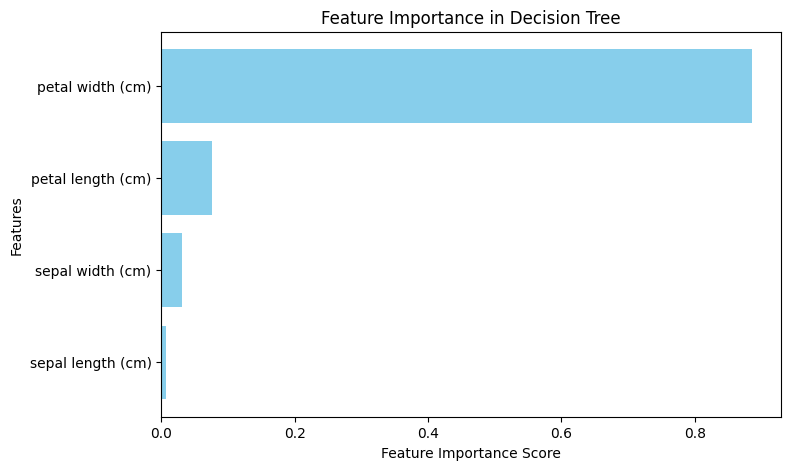

In [ ]:
# Get feature importance scores
feature_importance = clf.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(data.feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()


In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
print(ccp_alphas)
print(impurities)

[0.         0.00666667 0.00811404 0.04682927 0.25230131 0.33755802]
[0.         0.01333333 0.0295614  0.07639067 0.32869198 0.66625   ]


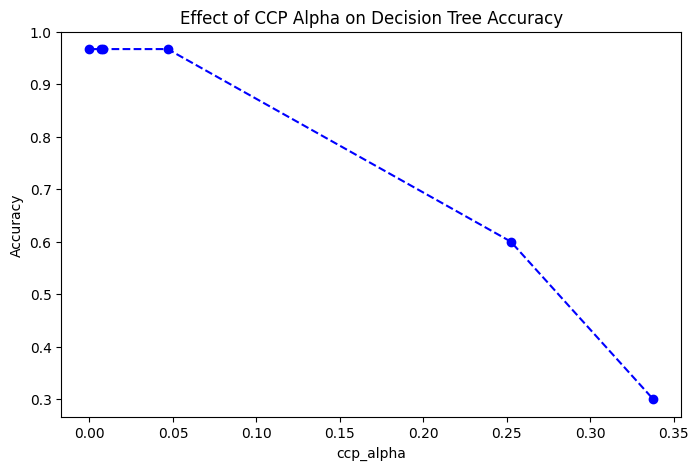

In [ ]:
# Train a decision tree for each alpha value
trees = []
accuracies = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    predictions = pruned_tree.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    trees.append(pruned_tree)
    accuracies.append(acc)

# Plot alpha vs. accuracy
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, accuracies, marker="o", linestyle="--", color="b")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of CCP Alpha on Decision Tree Accuracy")
plt.show()